In [31]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.patches as mpatches

# File to Load (Remember to change these)
city_data_to_load = pd.read_csv("c:/classwork/matplot/city_data.csv")
ride_data_to_load = pd.read_csv("c:/classwork/matplot/ride_data.csv")
cityridemerge=pd.merge(city_data_to_load,ride_data_to_load,on="city")
cityridemergecp=cityridemerge.copy()
#cityridemerge.to_csv("c:/classwork/citymerge.csv")
cityridefirst=cityridemerge.groupby("city").first().reset_index()
#cityridefirst.to_csv("c:/classwork/pyber.csv")
cityridefirst.head(10)
# Read the City and Ride Data

# Combine the data into a single dataset

# Display the data table for preview


,city,driver_count,type,date,fare,ride_id
0,Amandaburgh,12,Urban,2018-03-05 02:15:38,26.28,906850928986
1,Barajasview,26,Urban,2018-01-15 02:59:07,19.52,8268107272481
2,Barronchester,11,Suburban,2018-01-27 03:08:01,27.79,6653622887913
3,Bethanyland,22,Suburban,2018-04-01 22:04:35,38.71,8221076873967
4,Bradshawfurt,7,Rural,2018-03-06 21:44:53,19.74,6080367372860
5,Brandonfort,10,Suburban,2018-01-14 12:35:27,28.02,8100258078935
6,Carriemouth,52,Urban,2018-02-25 08:26:25,32.37,6918425016992
7,Christopherfurt,41,Urban,2018-04-17 02:25:49,23.30,7819057680096
8,Colemanland,23,Suburban,2018-04-20 02:52:45,20.83,2981565641427
9,Davidfurt,23,Suburban,2018-01-05 13:42:28,31.48,1953915881204


,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

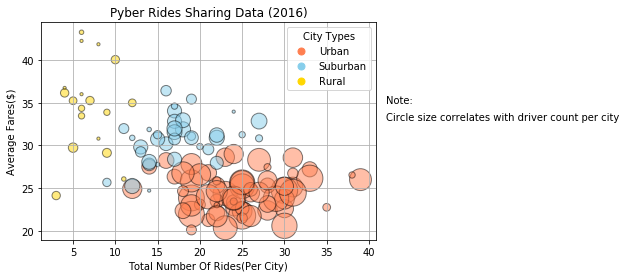

In [26]:
# Obtain the x and y coordinates for each of the three city types



#Average Fare ($) Per City

avgfarebycity=cityridemerge.groupby("city").agg({"fare":lambda x:(x.sum()/x.count())})

#Total Number of Rides Per City


totalridesbycity=cityridemerge.groupby("city").agg({"ride_id":"count"}).rename(columns={"ride_id":"ride_count"})
#print(totalridesbycity)
#Total Number of Drivers Per City

citymergedrop=cityridemergecp.drop_duplicates(["city","driver_count","type"])
del citymergedrop["date"]
del citymergedrop["fare"]
del citymergedrop["ride_id"]
driverfaremerge=pd.merge(citymergedrop,avgfarebycity,on="city")
driverfareridesmerge=pd.merge(driverfaremerge,totalridesbycity,on="city")
driverfareridesmerge["colour"]="R"
coloursmap={"Urban":"coral","Suburban":"skyblue","Rural":"gold"}
driverfareridesmerge["colour"]=driverfareridesmerge["type"].map(coloursmap)

totalrides=driverfareridesmerge["ride_count"]
avgfare=driverfareridesmerge["fare"]
drivercount=driverfareridesmerge["driver_count"]
citytype=driverfareridesmerge["type"].unique()

citytypecolour=driverfareridesmerge["colour"]
l=[]


#patches = [ plt.plot([],[], marker="o", ms=10, ls="", mec=None, color=colors[i], 
            #label="{:s}".format(texts[i]) )[0]  for i in range(len(texts)) ]

patches = [ plt.plot([],[], marker="o", ms=7, ls="",color=coloursmap[citytype[i]], 
            label=citytype[i])[0]  for i in range(len(citytype)) ]



#for i in range(len(citytype)):
    
   # l.append(mpatches.Patch(color=coloursmap[citytype[i]],label=citytype[i],alpha=0.5,marker="o"))
plt.legend(handles=patches,loc="best",title="City Types")
    
    

#driverfareridesmerge.to_csv("c:/classwork/driverfares.csv")
#driverfareridesmerge.loc[driverfareridesmerge["type"]=="Urban","colour"]="Orange"
#driverfareridesmerge.loc[driverfareridesmerge["type"]=="Suburban","colour"]="Red"
#driverfareridesmerge.loc[driverfareridesmerge["type"]=="Rural","colour"]="Yellow"

plt.scatter(x=totalrides,y=avgfare,s=drivercount*10,alpha=0.5,c=citytypecolour,edgecolor="black")
plt.xlabel("Total Number Of Rides(Per City)")
plt.ylabel("Average Fares($)")
plt.title("Pyber Rides Sharing Data (2016)")
plt.text(42,35,"Note:",fontsize=10)
plt.text(42,33,"Circle size correlates with driver count per city",fontsize=10)
plt.grid()
plt.savefig("c:/classwork/bubble.pdf")

#refer https://www.programcreek.com/python/example/94460/matplotlib.patches.Patch

#plt.show()



# Build the scatter plots for each city types

# Incorporate the other graph properties

# Create a legend

# Incorporate a text label regarding circle size

# Save Figure


In [20]:
# Show plot
plt.show()

## Total Fares by City Type

               fare
type               
Rural      6.811493
Suburban  30.463872
Urban     62.724635


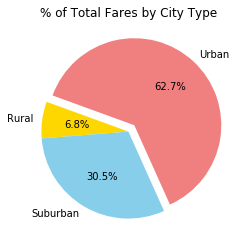

<Figure size 432x288 with 0 Axes>

In [27]:
# Calculate Type Percents
totalfare=cityridemerge["fare"].sum()
avgfarebycity=cityridemerge.groupby("type").agg({"fare":lambda x:(x.sum()/totalfare)*100})

print(avgfarebycity)
citytypes=avgfarebycity.keys()
colours=["gold","skyblue","lightcoral"]
expl=(0,0,0.1)

fare_pie=avgfarebycity.plot(kind="pie",legend=False,y=citytypes,title="% of Total Fares by City Type",explode=expl,colors=colours,startangle=160,autopct='%1.1f%%')

plt.ylabel('')
plt.show()
plt.savefig("c:/classwork/totafares.pdf")
# Build Pie Chart

# Save Figure


## Total Rides by City Type

            ride_id
type               
Rural      5.263158
Suburban  26.315789
Urban     68.421053


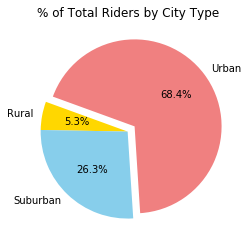

<Figure size 432x288 with 0 Axes>

In [29]:
totalrides=cityridemerge["ride_id"].count()

totalridesbycity=cityridemerge.groupby("type").agg({"ride_id":lambda x:(x.count()/totalrides)*100})
print(totalridesbycity)
citytypes=totalridesbycity.keys()
colours=["gold","skyblue","lightcoral"]
expl=(0,0,0.1)

rides_pie=totalridesbycity.plot(kind="pie",legend=False,y=citytypes,title="% of Total Riders by City Type",explode=expl,colors=colours,startangle=160,autopct='%1.1f%%')
plt.ylabel('')

plt.show()
plt.savefig("c:/classwork/totarides.pdf")

## Total Drivers by City Type

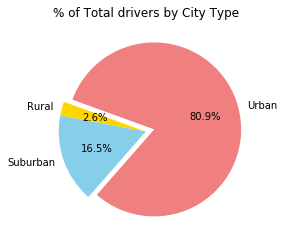

In [30]:
citymergedrop=cityridemergecp.drop_duplicates(["city","driver_count","type"])

totaldrivers=citymergedrop["driver_count"].sum()

perdrivers=citymergedrop.groupby("type").agg({"driver_count":lambda x:(x.sum()/totaldrivers)*100})
#City Type (Urban, Suburban, Rural)
citytypes=perdrivers.keys()

#print(perdrivers1)
colours=["gold","skyblue","lightcoral"]
expl=(0,0,0.1)

driver_pie=perdrivers.plot(kind="pie",y=citytypes,legend=False,title="% of Total drivers by City Type",explode=expl,colors=colours,startangle=160,autopct='%1.1f%%')
plt.ylabel('')
plt.savefig("c:/classwork/totadrivers.pdf")
plt.show()


In [36]:
# Show Figure
